In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.insert(1, "../src/features")
import data_cleaning

# allows all columns to be displayed
pd.set_option('display.max_columns', None)

In [2]:
OFFER_DATA_DIR = "../data/merged_clean2_outlier_removed.pkl"
ORDER_DATA_DIR = "../data/orders_clean2_outlier_removed.pkl"

merged = pd.read_pickle(OFFER_DATA_DIR)
order = pd.read_pickle(ORDER_DATA_DIR)

In [3]:
merged

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL
0,1,1,2019-11-13 05:30:16,1290.000,0,2019-11-12 09:38:54,2019-11-13 14:00:00,380,787,682.0,20.0,1,0,0,1,1,0.0,0,1163.8767,1,28.0,8.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,11,12,1,46,11,13,2,46,11,13,2,46,1,0
1,2,2,2019-12-06 08:43:01,2709.000,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,0,49,12,6,4,49,12,6,4,49,1,0
2,3,2,2019-12-06 08:45:31,3225.000,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,0,49,12,6,4,49,12,6,4,49,1,0
3,4,2,2019-12-06 08:48:09,2580.000,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,0,49,12,6,4,49,12,6,4,49,1,0
4,5,2,2019-12-06 08:49:46,3870.000,0,2019-12-02 13:01:37,2019-12-06 14:00:00,380,787,682.0,32.0,1,0,0,1,1,0.0,0,1865.2626,1,96.0,5.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,12,2,0,49,12,6,4,49,12,6,4,49,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687305,1688,186212,2021-06-24 05:56:38,7417.500,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,9.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,2,25,6,24,3,25,6,24,3,25,0,0
687306,1688,186212,2021-06-24 06:00:00,7417.500,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,9.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,2,25,6,24,3,25,6,24,3,25,0,0
687307,570,186212,2021-06-24 06:06:34,7659.375,0,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,8.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,2,25,6,24,3,25,6,24,3,25,0,0
687308,570,186212,2021-06-24 06:06:53,7256.250,1,2021-06-23 09:41:43,2021-06-24 15:00:00,882,047,2455.0,30.0,1,0,0,0,0,0.0,0,9421.3344,1,29.0,8.0,-1.158579e+07,3.864878e+06,-7.608280e+06,5.850300e+06,6,23,2,25,6,24,3,25,6,24,3,25,0,0


In [4]:
order = order.reset_index()
order

,REFERENCE_NUMBER,CARRIER_ID,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT
0,60316,26717,2019-11-13 05:53:26,1077.15,0,2019-11-04 09:11:34,2019-11-13 11:00:00,273,467,544.0,26.0,1,0,0,1,1,0.0,0,967.5000,1,217.0,5.0,-8.857569e+06,4.252157e+06,-9.485917e+06,5.010174e+06,11,4,0,45,11,13,2,46,11,13,2,46,1,0,1,1
1,18193,4932,2019-11-13 07:12:11,3096.00,0,2019-11-06 08:10:02,2019-11-15 17:00:00,971,770,2285.0,24.0,1,0,0,1,1,0.0,1,3058.0353,1,224.0,57.0,-1.374801e+07,5.685799e+06,-1.062056e+07,3.455990e+06,11,6,2,45,11,15,4,46,11,13,2,46,1,0,2,2
2,115347,2429,2019-11-14 10:55:36,1290.00,0,2019-11-06 14:42:18,2019-11-14 15:30:00,945,983,798.0,12.0,1,0,0,1,1,0.0,0,1034.0382,1,192.0,4.0,-1.358223e+07,4.559742e+06,-1.368258e+07,5.981599e+06,11,6,2,45,11,14,3,46,11,14,3,46,1,0,1,1
3,7067,7813,2019-11-15 08:49:56,1290.00,0,2019-11-06 15:24:11,2019-11-20 16:00:00,928,604,1971.0,13.0,1,0,0,1,1,0.0,0,999.7500,1,336.0,127.0,-1.310308e+07,3.983839e+06,-9.807845e+06,5.041104e+06,11,6,2,45,11,20,2,47,11,15,4,46,1,0,5,5
4,158844,2676,2019-11-22 07:12:47,1548.00,0,2019-11-06 15:59:11,2019-11-22 16:00:00,928,985,1113.0,11.0,1,0,0,1,1,0.0,0,1161.0000,1,384.0,8.0,-1.310308e+07,3.983839e+06,-1.373606e+07,5.921827e+06,11,6,2,45,11,22,4,47,11,22,4,47,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175502,3208,4446,2022-10-17 08:00:37,4902.00,0,2022-10-17 07:54:03,2022-10-18 17:00:00,923,402,2057.0,32.0,1,0,0,1,1,0.0,0,4147.5306,1,33.0,32.0,-1.294139e+07,4.177000e+06,-9.535618e+06,4.579493e+06,10,17,0,42,10,18,1,42,10,17,0,42,1,0,8,8
175503,107370,1556,2022-10-17 07:57:21,2257.50,0,2022-10-17 07:54:28,2022-10-18 17:00:00,923,600,1979.0,14.0,1,0,0,1,1,0.0,0,2163.7299,1,33.0,33.0,-1.294139e+07,4.177000e+06,-9.813381e+06,5.176338e+06,10,17,0,42,10,18,1,42,10,17,0,42,1,0,12,12
175504,76562,5529,2022-10-17 08:19:12,6450.00,1,2022-10-17 07:55:37,2022-10-24 15:00:00,890,170,2384.0,53.0,1,0,0,0,0,0.0,0,6612.0240,1,175.0,174.0,-1.289111e+07,4.491655e+06,-8.586052e+06,4.899594e+06,10,17,0,42,10,24,0,43,10,17,0,42,1,1,1,1
175505,50138,230,2022-10-17 07:58:27,451.50,1,2022-10-17 07:55:43,2022-10-18 16:00:00,972,972,10.0,6.0,1,0,0,1,1,0.0,0,538.0461,1,32.0,32.0,-1.365969e+07,5.679904e+06,-1.365969e+07,5.679904e+06,10,17,0,42,10,18,1,42,10,17,0,42,1,0,3,3


In [5]:
merge_order = pd.merge(merged, order[['REFERENCE_NUMBER', 'OFFER_COUNT', "FTL_OFFER_COUNT"]], how = "left", on = "REFERENCE_NUMBER")

In [6]:
merge_order.head(1)

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT
0,1,1,2019-11-13 05:30:16,1290.0,0,2019-11-12 09:38:54,2019-11-13 14:00:00,380,787,682.0,20.0,1,0,0,1,1,0.0,0,1163.8767,1,28.0,8.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,11,12,1,46,11,13,2,46,11,13,2,46,1,0,1,1


In [7]:
merge_order.columns

Index(['CARRIER_ID', 'REFERENCE_NUMBER', 'CREATED_ON_HQ', 'RATE_USD',
       'IS_OFFER_APPROVED', 'ORDER_DATETIME_PST', 'PICKUP_DEADLINE_PST',
       'ORIGIN_3DIGIT_ZIP', 'DESTINATION_3DIGIT_ZIP',
       'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET',
       'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED',
       'STRAIGHT_TRUCK_ALLOWED', 'LOAD_BAR_COUNT', 'LOAD_TO_RIDE_REQUESTED',
       'ESTIMATED_COST_AT_ORDER', 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS',
       'REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y', 'DESTINATION_X',
       'DESTINATION_Y', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK',
       'ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK',
       'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK',
       'OFFER_WEEK', 'OFFER_IS_FTL', 'ESTIMATED_MODE_IS_FTL', 'OFFER_COUNT',
       'FTL_OFFER_COUNT'],
      dtype='object')

In [8]:
# ['RATE_USD', 'IS_OFFER_APPROVED', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET','FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED',
# 'STRAIGHT_TRUCK_ALLOWED', 'LOAD_BAR_COUNT', 'LOAD_TO_RIDE_REQUESTED','ESTIMATED_COST_AT_ORDER', 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y', 'DESTINATION_X','DESTINATION_Y', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 
# 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK','DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK','OFFER_WEEK', 'OFFER_IS_FTL', 'ESTIMATED_MODE_IS_FTL', 'OFFER_COUNT','FTL_OFFER_COUNT']

X = merge_order[['RATE_USD', 'IS_OFFER_APPROVED', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET','FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED',
'STRAIGHT_TRUCK_ALLOWED', 'LOAD_BAR_COUNT', 'LOAD_TO_RIDE_REQUESTED','ESTIMATED_COST_AT_ORDER', 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y', 'DESTINATION_X','DESTINATION_Y', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 
'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK','DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK','OFFER_WEEK', 'OFFER_IS_FTL', 'ESTIMATED_MODE_IS_FTL']]
y = merge_order[['OFFER_COUNT']]

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MaxAbsScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [10]:
merge_order.head(1)

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT
0,1,1,2019-11-13 05:30:16,1290.0,0,2019-11-12 09:38:54,2019-11-13 14:00:00,380,787,682.0,20.0,1,0,0,1,1,0.0,0,1163.8767,1,28.0,8.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,11,12,1,46,11,13,2,46,11,13,2,46,1,0,1,1


### Decision Tree (number of offers)

In [12]:
num_feat = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT','ESTIMATED_COST_AT_ORDER', 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y', 'DESTINATION_X','DESTINATION_Y']
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['IS_OFFER_APPROVED', 'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK',
            'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 'ESTIMATED_MODE_IS_FTL']
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 44)

pl = Pipeline(steps=[('preprocessor', preproc), ('clf', DecisionTreeClassifier(max_depth=40))])
pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['RATE_USD',
                                                   'APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'LOAD_BAR_COUNT',
                                                   'ESTIMATED_COST_AT_ORDER',
                                                   'DEADLINE_ON_WEEKDAY',
                                                   'GIVEN_HOURS',
                                                   'REMAINING_HOURS',
                                                   'ORIGIN_X', 'ORIGIN_Y',
                                                   'DESTINATION_X',
                                                   'DESTINATION_Y']),
                                                 ('c...
                                                   'HAZARDOUS',
                                                   'REEFER_ALLOWED',
                                                   'STRAIGHT_TRUCK_ALLOWED',
                                                   'LOAD_TO_RIDE_REQUESTED',
                                                   'ORDER_MONTH', 'ORDER_DAY',
                                                   'ORDER_DAY_OF_WEEK',
                                                   'ORDER_WEEK',
                                                   'DEADLINE_MONTH',
                                                   'DEADLINE_DAY',
                                                   'DEADLINE_DAY_OF_WEEK',
                                                   'DEADLINE_WEEK',
                                                   'OFFER_MONTH', 'OFFER_DAY',
                                                   'OFFER_DAY_OF_WEEK',
                                                   'OFFER_WEEK', 'OFFER_IS_FTL',
                                                   'ESTIMATED_MODE_IS_FTL'])])),
                ('clf', DecisionTreeClassifier(max_depth=40))])

In [13]:
from sklearn.metrics import mean_squared_error

y_preds = pl.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

6.070050874665968

In [14]:
6 ** 0.5

2.449489742783178

[('ORIGIN_X', 0.0), ('GIVEN_HOURS', 3.534765824087559e-05), ('PALLETIZED_LINEAR_FEET', 0.0005833083527992816), ('DEADLINE_ON_WEEKDAY', 0.0014464087019840602), ('ESTIMATED_MODE_IS_FTL', 0.0018101531454235117), ('EXCLUSIVE_USE_REQUESTED', 0.002503314380469966), ('OFFER_IS_FTL', 0.0033533541101254767), ('REMAINING_HOURS', 0.004705942131729749), ('ORIGIN_Y', 0.008149109628263252), ('DESTINATION_Y', 0.00921541400971305), ('DESTINATION_X', 0.01161045694177934), ('OFFER_MONTH', 0.011961985991030504), ('ORDER_MONTH', 0.012121941252069682), ('DEADLINE_MONTH', 0.012942690495831447), ('OFFER_DAY_OF_WEEK', 0.017471737432253012), ('OFFER_WEEK', 0.02544222995722929), ('DEADLINE_DAY_OF_WEEK', 0.02632096807576542), ('DEADLINE_WEEK', 0.026797509011741445), ('ORDER_DAY_OF_WEEK', 0.02703776029247802), ('ORDER_WEEK', 0.02743768067138263), ('OFFER_DAY', 0.03471199303251091), ('RATE_USD', 0.03587438798659259), ('REEFER_ALLOWED', 0.04644662529491977), ('DEADLINE_DAY', 0.04937092929648309), ('ORDER_DAY', 0.05

<AxesSubplot: >

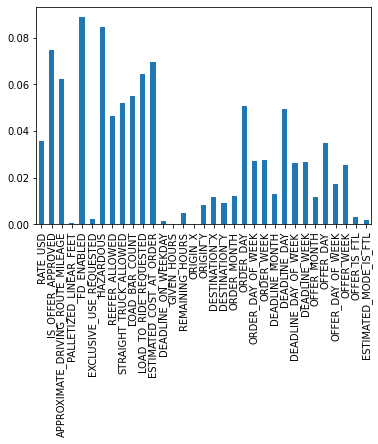

In [15]:
feature_importances = pl.named_steps['clf'].feature_importances_
feature_dict = dict(zip(X.columns,feature_importances))
df = pd.DataFrame(feature_dict.values(), feature_dict.keys())
print(sorted(feature_dict.items(), key=lambda x: x[1]))
df[0].plot.bar()

In [16]:
pl.named_steps['clf'].tree_.max_depth

40

In [17]:
num_feat = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'LOAD_BAR_COUNT','ESTIMATED_COST_AT_ORDER']
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['IS_OFFER_APPROVED', 'FD_ENABLED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK',
            'DEADLINE_WEEK', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK']
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 44)

pl = Pipeline(steps=[('preprocessor', preproc), ('clf', DecisionTreeClassifier(max_depth=40))])
pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['RATE_USD',
                                                   'APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'LOAD_BAR_COUNT',
                                                   'ESTIMATED_COST_AT_ORDER']),
                                                 ('categorization',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['IS_OFFER_APPROVED',
                                                   'FD_ENABLED', 'HAZARDOUS',
                                                   'REEFER_ALLOWED',
                                                   'STRAIGHT_TRUCK_ALLOWED',
                                                   'LOAD_TO_RIDE_REQUESTED',
                                                   'ORDER_DAY',
                                                   'ORDER_DAY_OF_WEEK',
                                                   'ORDER_WEEK', 'DEADLINE_DAY',
                                                   'DEADLINE_DAY_OF_WEEK',
                                                   'DEADLINE_WEEK', 'OFFER_DAY',
                                                   'OFFER_DAY_OF_WEEK',
                                                   'OFFER_WEEK'])])),
                ('clf', DecisionTreeClassifier(max_depth=40))])

In [18]:
from sklearn.metrics import mean_squared_error

y_preds = pl.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

5.5715373460786735

In [19]:
pl.named_steps['clf'].tree_.max_depth

40

In [20]:
parameters = {
    'max_depth': [1, 5, 10, 20, 30, 40], 
    'min_samples_split':[2,3,5,10],
    'min_samples_leaf':[2,3,5,10]
}

In [ ]:
num_feat = ['RATE_USD', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'LOAD_BAR_COUNT','ESTIMATED_COST_AT_ORDER']
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['IS_OFFER_APPROVED', 'FD_ENABLED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK',
            'DEADLINE_WEEK', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK']
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 44)

pl = Pipeline(steps=[('preprocessor', preproc), ('clf', GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5))])
pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['RATE_USD',
                                                   'APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'LOAD_BAR_COUNT',
                                                   'ESTIMATED_COST_AT_ORDER']),
                                                 ('categorization',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['IS_OFFER_APPROVED',
                                                   'FD_ENABLED', 'HAZARDOUS',
                                                   'REEFER_ALLOWED',
                                                   'STRAIGHT...ALLOWED',
                                                   'LOAD_TO_RIDE_REQUESTED',
                                                   'ORDER_DAY',
                                                   'ORDER_DAY_OF_WEEK',
                                                   'ORDER_WEEK', 'DEADLINE_DAY',
                                                   'DEADLINE_DAY_OF_WEEK',
                                                   'DEADLINE_WEEK', 'OFFER_DAY',
                                                   'OFFER_DAY_OF_WEEK',
                                                   'OFFER_WEEK'])])),
                ('clf',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              param_grid={'max_depth': [1, 5, 10, 20, 30, 40],
                                          'min_samples_leaf': [2, 3, 5, 10],
                                          'min_samples_split': [2, 3, 5,
                                                                10]}))])

In [ ]:
pl.named_steps['clf'].best_params_

{'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [22]:
y_preds = pl.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

7.4740316111604175

### Regression models

In [21]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [22]:
merge_order.head(1)

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,IS_OFFER_APPROVED,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,HAZARDOUS,REEFER_ALLOWED,STRAIGHT_TRUCK_ALLOWED,LOAD_BAR_COUNT,LOAD_TO_RIDE_REQUESTED,ESTIMATED_COST_AT_ORDER,DEADLINE_ON_WEEKDAY,GIVEN_HOURS,REMAINING_HOURS,ORIGIN_X,ORIGIN_Y,DESTINATION_X,DESTINATION_Y,ORDER_MONTH,ORDER_DAY,ORDER_DAY_OF_WEEK,ORDER_WEEK,DEADLINE_MONTH,DEADLINE_DAY,DEADLINE_DAY_OF_WEEK,DEADLINE_WEEK,OFFER_MONTH,OFFER_DAY,OFFER_DAY_OF_WEEK,OFFER_WEEK,OFFER_IS_FTL,ESTIMATED_MODE_IS_FTL,OFFER_COUNT,FTL_OFFER_COUNT
0,1,1,2019-11-13 05:30:16,1290.0,0,2019-11-12 09:38:54,2019-11-13 14:00:00,380,787,682.0,20.0,1,0,0,1,1,0.0,0,1163.8767,1,28.0,8.0,-9.954368e+06,4.214147e+06,-1.088781e+07,3.518917e+06,11,12,1,46,11,13,2,46,11,13,2,46,1,0,1,1


In [23]:
X = merge_order[['IS_OFFER_APPROVED', 'APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET','FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED',
'STRAIGHT_TRUCK_ALLOWED', 'LOAD_BAR_COUNT', 'LOAD_TO_RIDE_REQUESTED','ESTIMATED_COST_AT_ORDER', 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y', 'DESTINATION_X','DESTINATION_Y', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 
'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK','DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK','OFFER_WEEK', 'OFFER_IS_FTL', 'ESTIMATED_MODE_IS_FTL', "OFFER_COUNT"]]
y = merge_order[['RATE_USD']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 44)

In [24]:
# create numerical value transformer
num_feat = ['APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT','ESTIMATED_COST_AT_ORDER', 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y', 'DESTINATION_X','DESTINATION_Y']
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['IS_OFFER_APPROVED', 'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK',
            'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 'ESTIMATED_MODE_IS_FTL']
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])


# create pipeline
pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', Ridge(alpha = 1))])
pl.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'LOAD_BAR_COUNT',
                                                   'ESTIMATED_COST_AT_ORDER',
                                                   'DEADLINE_ON_WEEKDAY',
                                                   'GIVEN_HOURS',
                                                   'REMAINING_HOURS',
                                                   'ORIGIN_X', 'ORIGIN_Y',
                                                   'DESTINATION_X',
                                                   'DESTINATION_Y']),
                                                 ('categorizati...
                                                   'EXCLUSIVE_USE_REQUESTED',
                                                   'HAZARDOUS',
                                                   'REEFER_ALLOWED',
                                                   'STRAIGHT_TRUCK_ALLOWED',
                                                   'LOAD_TO_RIDE_REQUESTED',
                                                   'ORDER_MONTH', 'ORDER_DAY',
                                                   'ORDER_DAY_OF_WEEK',
                                                   'ORDER_WEEK',
                                                   'DEADLINE_MONTH',
                                                   'DEADLINE_DAY',
                                                   'DEADLINE_DAY_OF_WEEK',
                                                   'DEADLINE_WEEK',
                                                   'OFFER_MONTH', 'OFFER_DAY',
                                                   'OFFER_DAY_OF_WEEK',
                                                   'OFFER_WEEK', 'OFFER_IS_FTL',
                                                   'ESTIMATED_MODE_IS_FTL'])])),
                ('regressor', Ridge(alpha=1))])

In [25]:
y_preds = pl.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

68604784231.10232

In [26]:
feature_names = ['APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT','ESTIMATED_COST_AT_ORDER', 'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS','REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y', 'DESTINATION_X','DESTINATION_Y', 
 'IS_OFFER_APPROVED', 'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_DAY_OF_WEEK','ORDER_WEEK', 'DEADLINE_MONTH', 'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK',
  'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY', 'OFFER_DAY_OF_WEEK', 'OFFER_WEEK', 'OFFER_IS_FTL', 'ESTIMATED_MODE_IS_FTL']

In [27]:
pl.named_steps['preprocessor']

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('scaler', MaxAbsScaler())]),
                                 ['APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                  'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT',
                                  'ESTIMATED_COST_AT_ORDER',
                                  'DEADLINE_ON_WEEKDAY', 'GIVEN_HOURS',
                                  'REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y',
                                  'DESTINATION_X', 'DESTINATION_Y']),
                                ('categorization',
                                 Pipeline(steps=[('onehot', Or...
                                 ['IS_OFFER_APPROVED', 'FD_ENABLED',
                                  'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS',
                                  'REEFER_ALLOWED', 'STRAIGHT_TRUCK_ALLOWED',
                                  'LOAD_TO_RIDE_REQUESTED', 'ORDER_MONTH',
                                  'ORDER_DAY', 'ORDER_DAY_OF_WEEK',
                                  'ORDER_WEEK', 'DEADLINE_MONTH',
                                  'DEADLINE_DAY', 'DEADLINE_DAY_OF_WEEK',
                                  'DEADLINE_WEEK', 'OFFER_MONTH', 'OFFER_DAY',
                                  'OFFER_DAY_OF_WEEK', 'OFFER_WEEK',
                                  'OFFER_IS_FTL', 'ESTIMATED_MODE_IS_FTL'])])

In [28]:
feature_coef = abs(pl.named_steps['regressor'].coef_[0])
feature_coef

array([4.67235483e+03, 1.01586181e+04, 3.71344200e+04, 4.37904489e+05,
       5.41191142e+02, 6.31881796e+03, 3.45639103e+03, 2.31578304e+04,
       1.73155345e+04, 2.19002899e+04, 4.20962178e+03, 5.01844979e+03,
       6.35279220e+03, 1.95430864e+03, 5.68040775e+03, 6.37361017e+03,
       4.16319965e+03, 4.76588409e+03, 1.06956507e+03, 1.93613794e+02,
       2.92649369e+02, 4.67800551e+02, 2.40149582e+03, 6.03207093e+02,
       8.69675657e+02, 2.13237976e+02, 3.85732633e+02, 4.98945958e+02,
       9.82091978e+01, 1.51234572e+02, 3.14630666e+03, 3.70270730e+02])

Text(0.5, 1.0, 'Feature Coef')

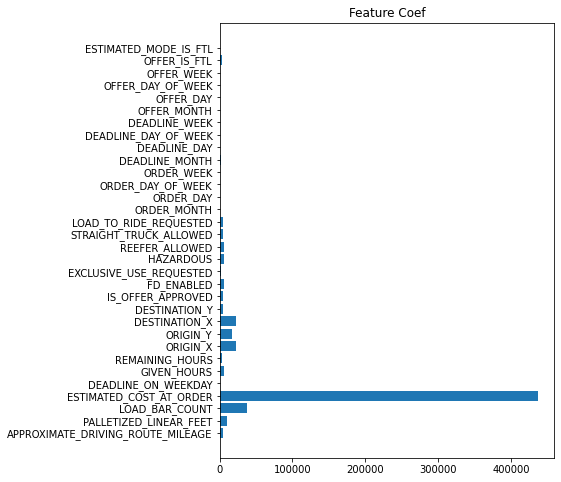

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,8))
plt.barh(feature_names,feature_coef, align='center',)
plt.title("Feature Coef")

In [30]:
# create numerical value transformer
num_feat = ['APPROXIMATE_DRIVING_ROUTE_MILEAGE', 'PALLETIZED_LINEAR_FEET', 'LOAD_BAR_COUNT','ESTIMATED_COST_AT_ORDER', 'GIVEN_HOURS','REMAINING_HOURS', 'ORIGIN_X', 'ORIGIN_Y', 'DESTINATION_X','DESTINATION_Y']
num_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())
])

cat_feat = ['IS_OFFER_APPROVED', 'FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED', 'HAZARDOUS', 'REEFER_ALLOWED','STRAIGHT_TRUCK_ALLOWED', 'LOAD_TO_RIDE_REQUESTED']
cat_transformer = Pipeline(steps=[
    ('onehot', OrdinalEncoder())     # output from Ordinal becomes input to OneHot
])

preproc = ColumnTransformer(
  transformers=[
      ("numerical", num_transformer, num_feat),
      ("categorization", cat_transformer, cat_feat)
  ])


# create pipeline
pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', Ridge(alpha = 1))])
pl.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MaxAbsScaler())]),
                                                  ['APPROXIMATE_DRIVING_ROUTE_MILEAGE',
                                                   'PALLETIZED_LINEAR_FEET',
                                                   'LOAD_BAR_COUNT',
                                                   'ESTIMATED_COST_AT_ORDER',
                                                   'GIVEN_HOURS',
                                                   'REMAINING_HOURS',
                                                   'ORIGIN_X', 'ORIGIN_Y',
                                                   'DESTINATION_X',
                                                   'DESTINATION_Y']),
                                                 ('categorization',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['IS_OFFER_APPROVED',
                                                   'FD_ENABLED',
                                                   'EXCLUSIVE_USE_REQUESTED',
                                                   'HAZARDOUS',
                                                   'REEFER_ALLOWED',
                                                   'STRAIGHT_TRUCK_ALLOWED',
                                                   'LOAD_TO_RIDE_REQUESTED'])])),
                ('regressor', Ridge(alpha=1))])

In [31]:
y_preds = pl.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

68583413042.912735

In [32]:
68583413042 ** 0.5

261884.35050991498

In [34]:
Ridge_MSE = []

for parameter in [0.001,0.01,0.1,1,10,20,30,40]:

  pl = Pipeline(steps=[('preprocessor', preproc), ("regressor", Ridge(alpha = parameter))])

  pl.fit(X_train, y_train)
  y_preds = pl.predict(X_test)

  mse = mean_squared_error(y_test, y_preds)
  Ridge_MSE.append(mse)
  print("MSE of %s%f is %s"%("Ridge_", parameter, mse))
  print("-------------------------")
  
Lasso_MSE = []

for parameter in [0.001,0.01,0.1,1,10,20,30,40]:

  pl = Pipeline(steps=[('preprocessor', preproc), ("regressor", Lasso(alpha = parameter))])

  pl.fit(X_train, y_train)
  y_preds = pl.predict(X_test)

  mse = mean_squared_error(y_test, y_preds)
  Ridge_MSE.append(mse)
  print("MSE of %s%f is %s"%("Lasso_", parameter, mse))
  print("-------------------------")

MSE of Ridge_0.001000 is 68583849262.84833
-------------------------
MSE of Ridge_0.010000 is 68583845227.79313
-------------------------
MSE of Ridge_0.100000 is 68583804984.41828
-------------------------
MSE of Ridge_1.000000 is 68583413042.912735
-------------------------
MSE of Ridge_10.000000 is 68580354731.584206
-------------------------
MSE of Ridge_20.000000 is 68578222589.91059
-------------------------
MSE of Ridge_30.000000 is 68576880616.08678
-------------------------
MSE of Ridge_40.000000 is 68576019924.88643
-------------------------
MSE of Lasso_0.001000 is 68583848978.8103
-------------------------
MSE of Lasso_0.010000 is 68583842392.16465
-------------------------
MSE of Lasso_0.100000 is 68583777113.982635
-------------------------
MSE of Lasso_1.000000 is 68583144559.333405
-------------------------
MSE of Lasso_10.000000 is 68577749936.71623
-------------------------
MSE of Lasso_20.000000 is 68572909417.39662
-------------------------
MSE of Lasso_30.000000 is